# Stock Prediction - LSTM 

## Import Libraries

In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\wgutierrezp\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Ingest Data 

In [6]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


## Exploratory Data Analysis

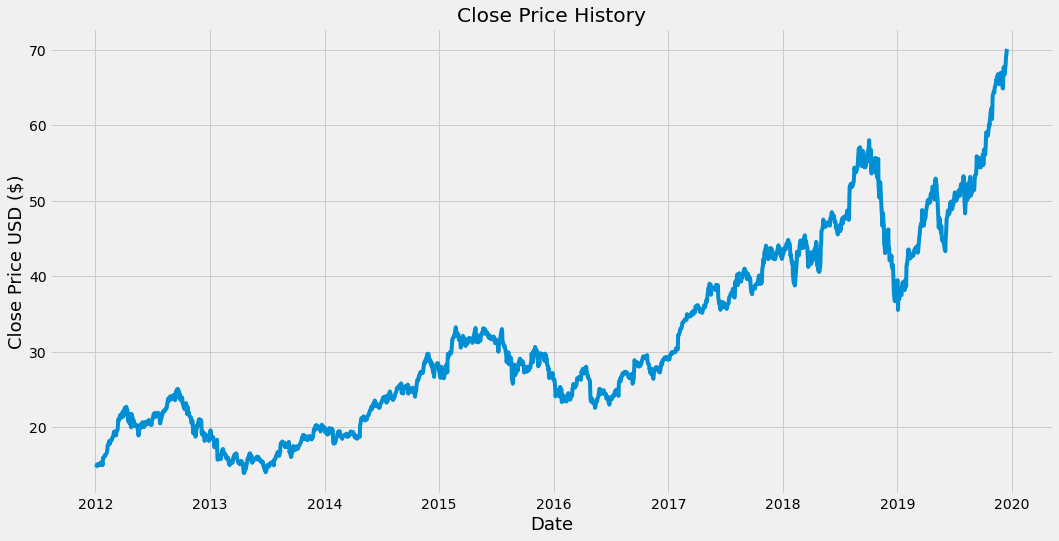

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
report = df.profile_report()
report.to_file('eda_stock_report.html')

## Data Preprocessing & Wrangling

In [9]:
#Select closing data
df_close = df[['Close']]

In [17]:
#Scale the data
scaler = sklearn.preprocessing.MinMaxScaler()
X = scaler.fit_transform(df_close)
X.shape

(2003, 1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train,x_test = train_test_split(X, test_size=0.2 ,shuffle=False)

In [19]:
x_train=[]
y_train = []
for i in range(60,len(X_train)):
    x_train.append(X_train[i-60:i,0])
    y_train.append(X_train[i,0])

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
#Build the LSTM network model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units=50, return_sequences=False))
model.add(keras.layers.Dense(units=25))
model.add(keras.layers.Dense(units=1))

In [28]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1542/1542 [==============================] - 96s 62ms/step - loss: 6.6687e-04
Epoch 2/10
1542/1542 [==============================] - 82s 53ms/step - loss: 2.9872e-04
Epoch 3/10
1542/1542 [==============================] - 89s 58ms/step - loss: 2.3582e-04
Epoch 4/10
1542/1542 [==============================] - 88s 57ms/step - loss: 1.7845e-04
Epoch 5/10
1542/1542 [==============================] - 80s 52ms/step - loss: 1.8930e-04
Epoch 6/10
1542/1542 [==============================] - 79s 51ms/step - loss: 1.3641e-04
Epoch 7/10
1542/1542 [==============================] - 83s 54ms/step - loss: 1.6522e-04
Epoch 8/10
1542/1542 [==============================] - 86s 56ms/step - loss: 1.4786e-04
Epoch 9/10
1542/1542 [==============================] - 86s 56ms/step - loss: 1.3760e-04
Epoch 10/10
1542/1542 [==============================] - 76s 49ms/step - loss: 1.3721e-04
